In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
import pylab
import seaborn as sns

In [4]:
# read HR-Employee-Attrition file
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.tsv.txt", sep='\t')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#find out key info about the dataset, the .T is to invert the matrix

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [4]:
#find how many unique values each row has



df.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [5]:
#because over18, standardhours, and employeecount have just 1 value, we can drop it 

df = df.drop(labels=['Over18','StandardHours','EmployeeCount'],axis=1)

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [6]:
#we have to separate categorical and continuous variables by checking the type of each column 



def seperation(df):
    cat = []
    con = []
    for i in df.columns:
        if df[i].dtype=='object':
            cat.append(i)
        else:
            con.append(i)
    return cat, con

In [7]:
cat, con = seperation(df)


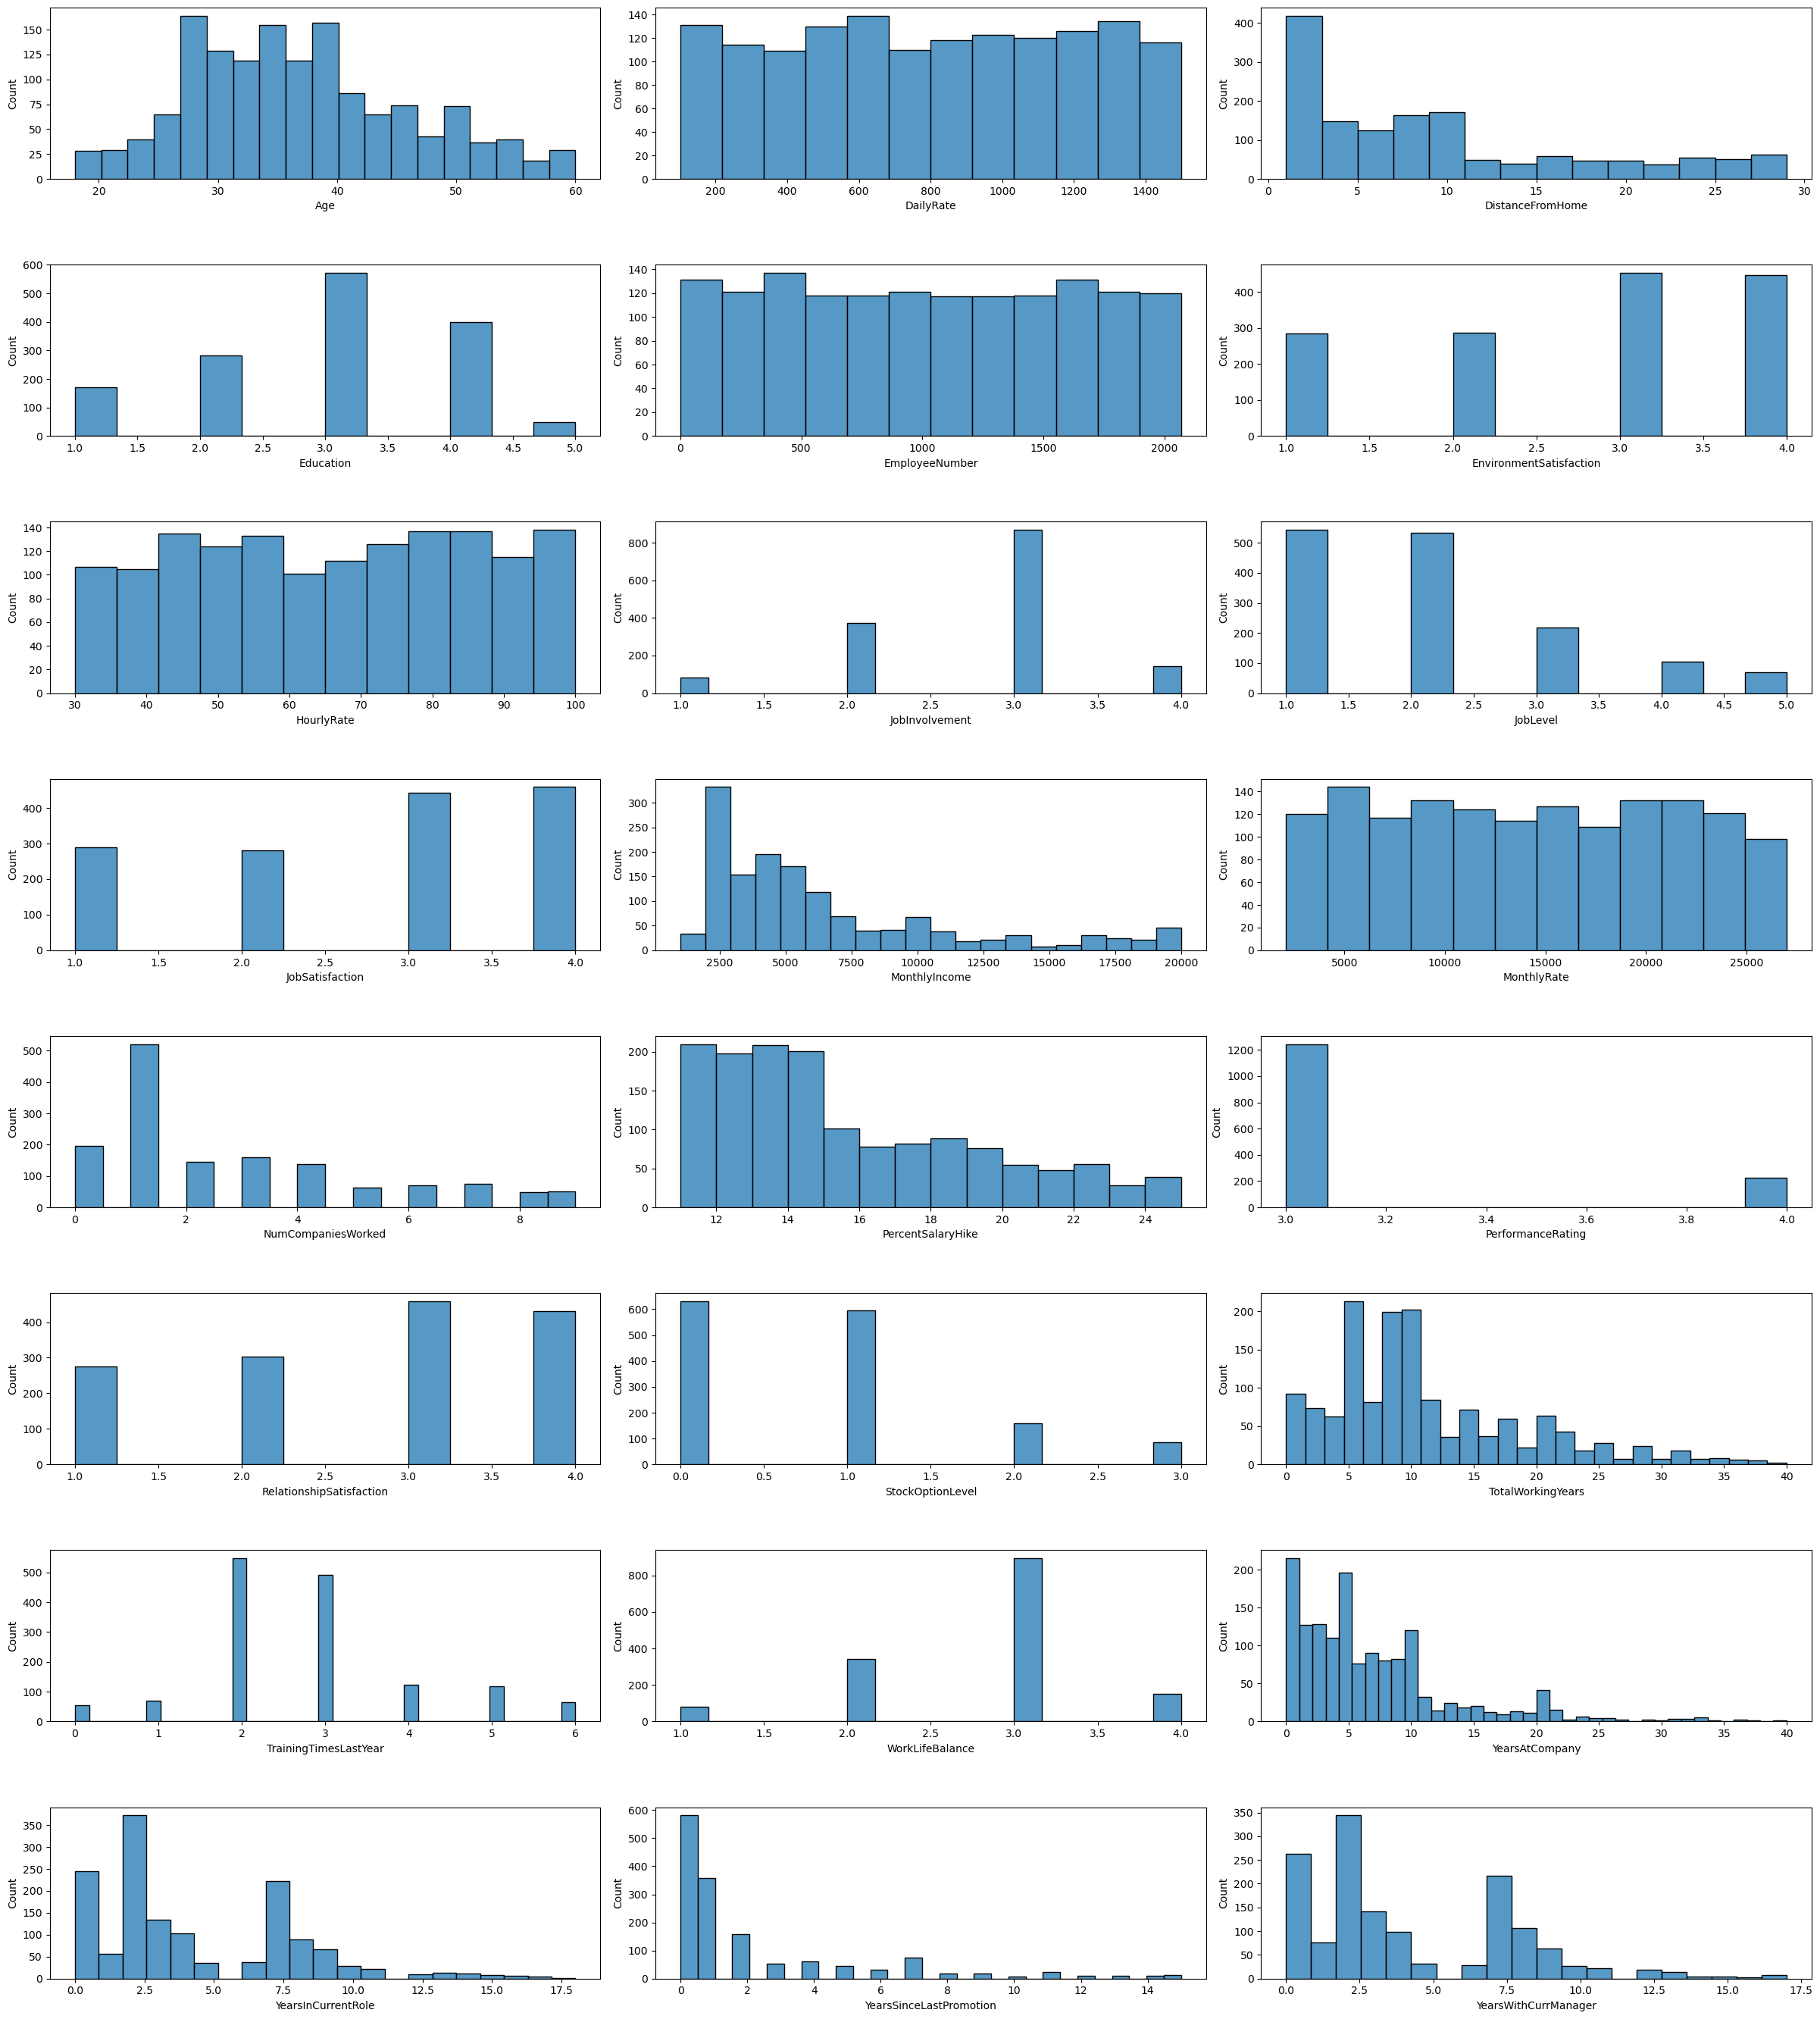

In [8]:
#we can use showcase trends with all the numerical data

plt.figure(figsize=(30,30))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.1)

x = 1
for i in con:
    plt.subplot(9,3,x)
    x = x+1
    sns.histplot(data = df, x = i, kde=False)
plt.show()

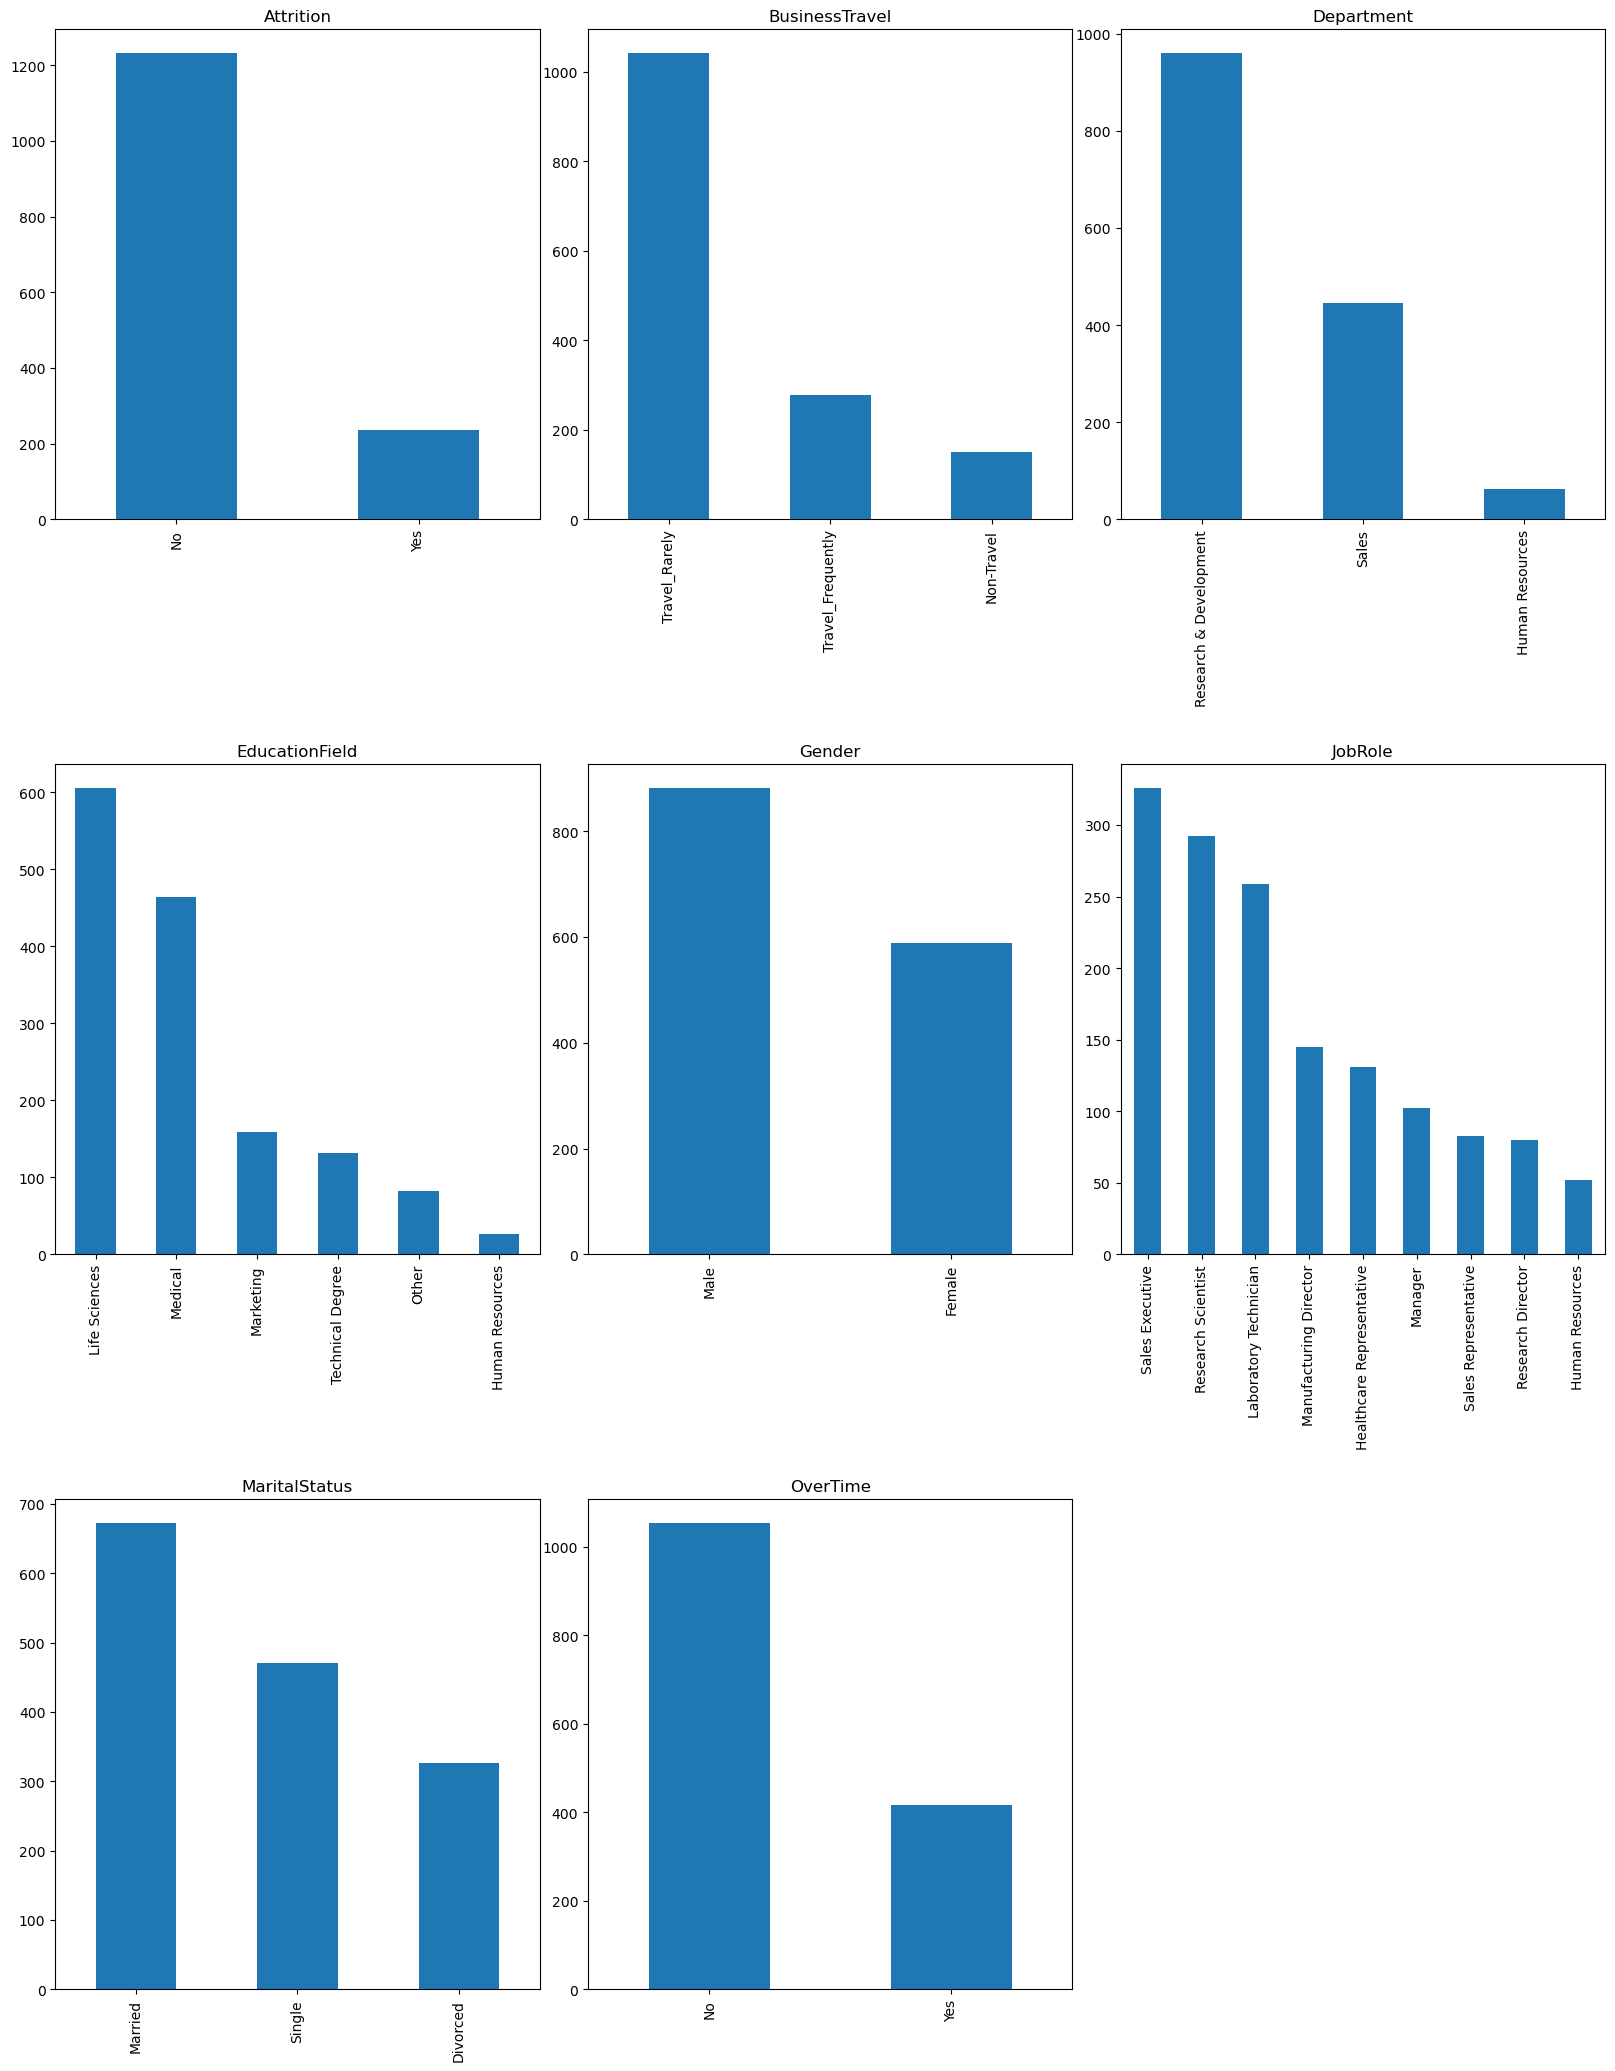

In [9]:
plt.figure(figsize=(20,20))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.1)
for i in cat:
    plt.subplot(3,3,x)
    x = x+1
    df[i].value_counts().plot(kind='bar')
    plt.title(i)
plt.show()

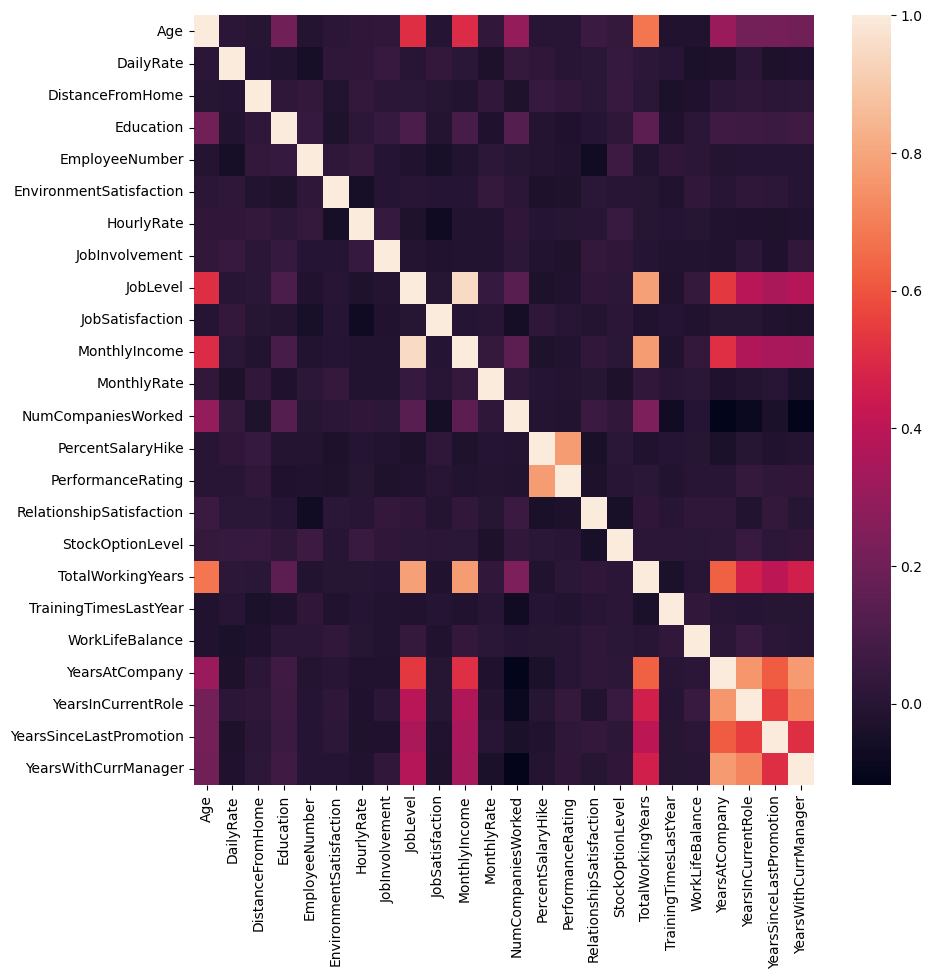

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()


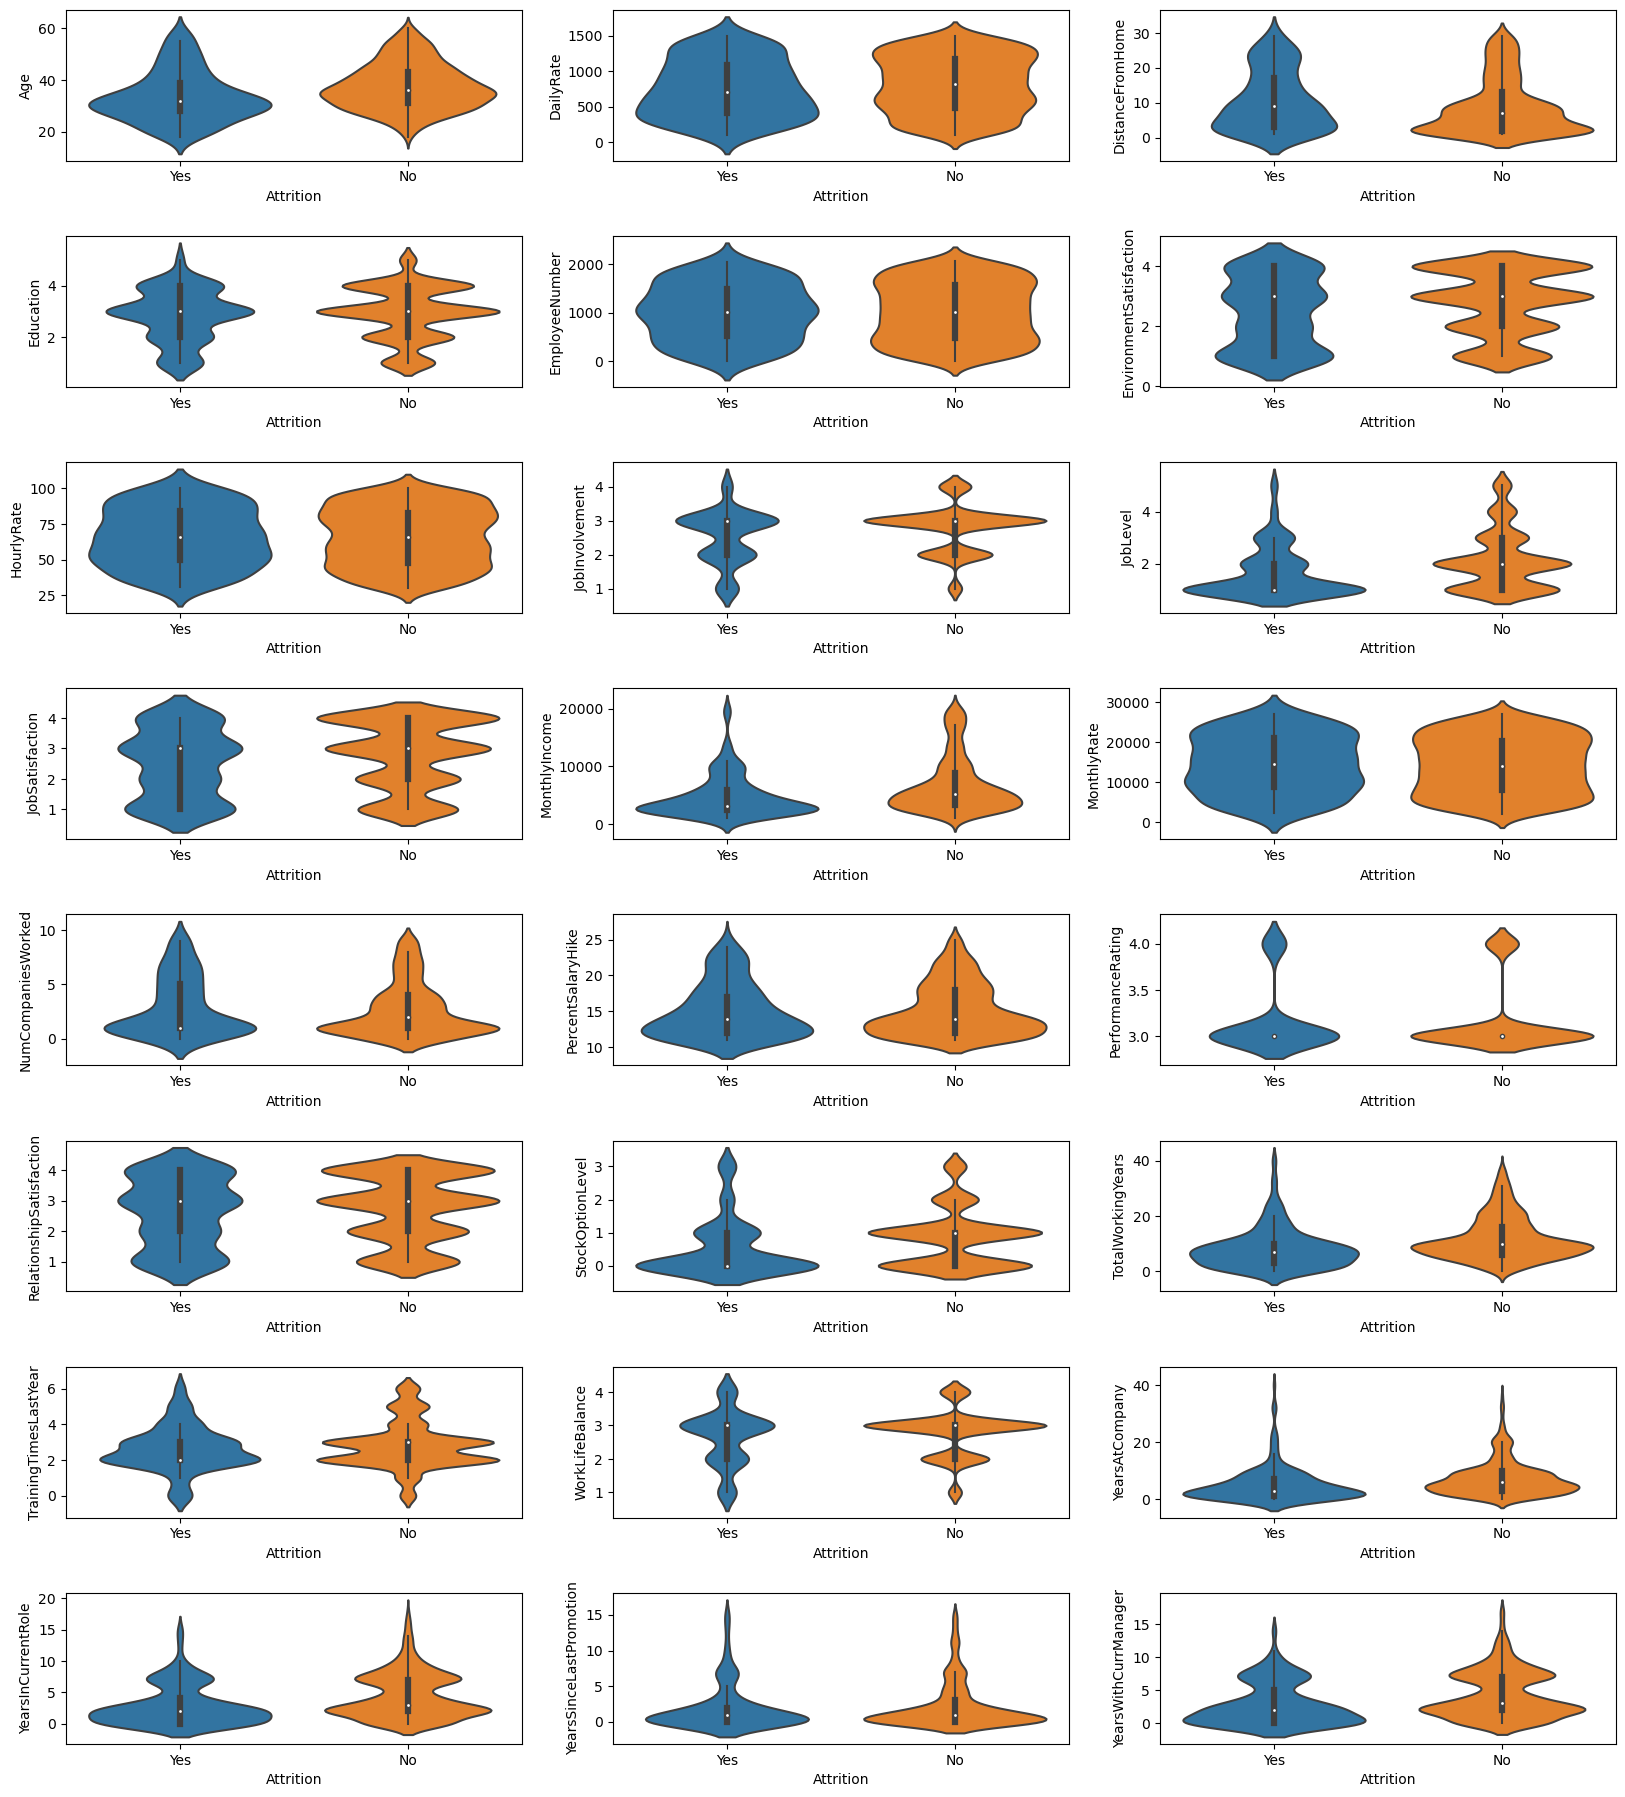

In [11]:
plt.figure(figsize=(20,20))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.2)


for i in con:
    plt.subplot(9,3,x)
    x = x + 1
    sns.violinplot(data=df,x='Attrition',y=i)
  
plt.show()

In [34]:
for i in con:
    plt.subplot(9,3,x)
    x = x + 1
    job_means = df.groupby("Attrition").mean()
    job_means = job_means.reset_index()
    job_means

    #job_list = job_means["Attrition"]
    #job_list = job_list.drop_duplicates()
    #job_list = job_list.tolist()
    #job_list
    
    job_no = job_means[job_means['Attrition'].str.contains('No')]
    job_no = job_no[i]
    job_no = job_no.tolist()
    job_no


    job_yes = job_means[job_means['Attrition'].str.contains('Yes')]
    job_yes = job_yes[i]
    job_yes = job_yes.tolist()
    job_yes

    job_df = pd.DataFrame({"Kept Job": job_no, "Left Job": job_yes})
    job_df
    job_df.plot(kind = 'bar')

    plt.xlabel("Hello")
    plt.show()




ValueError: num must be 1 <= num <= 27, not 28

<Figure size 640x480 with 0 Axes>

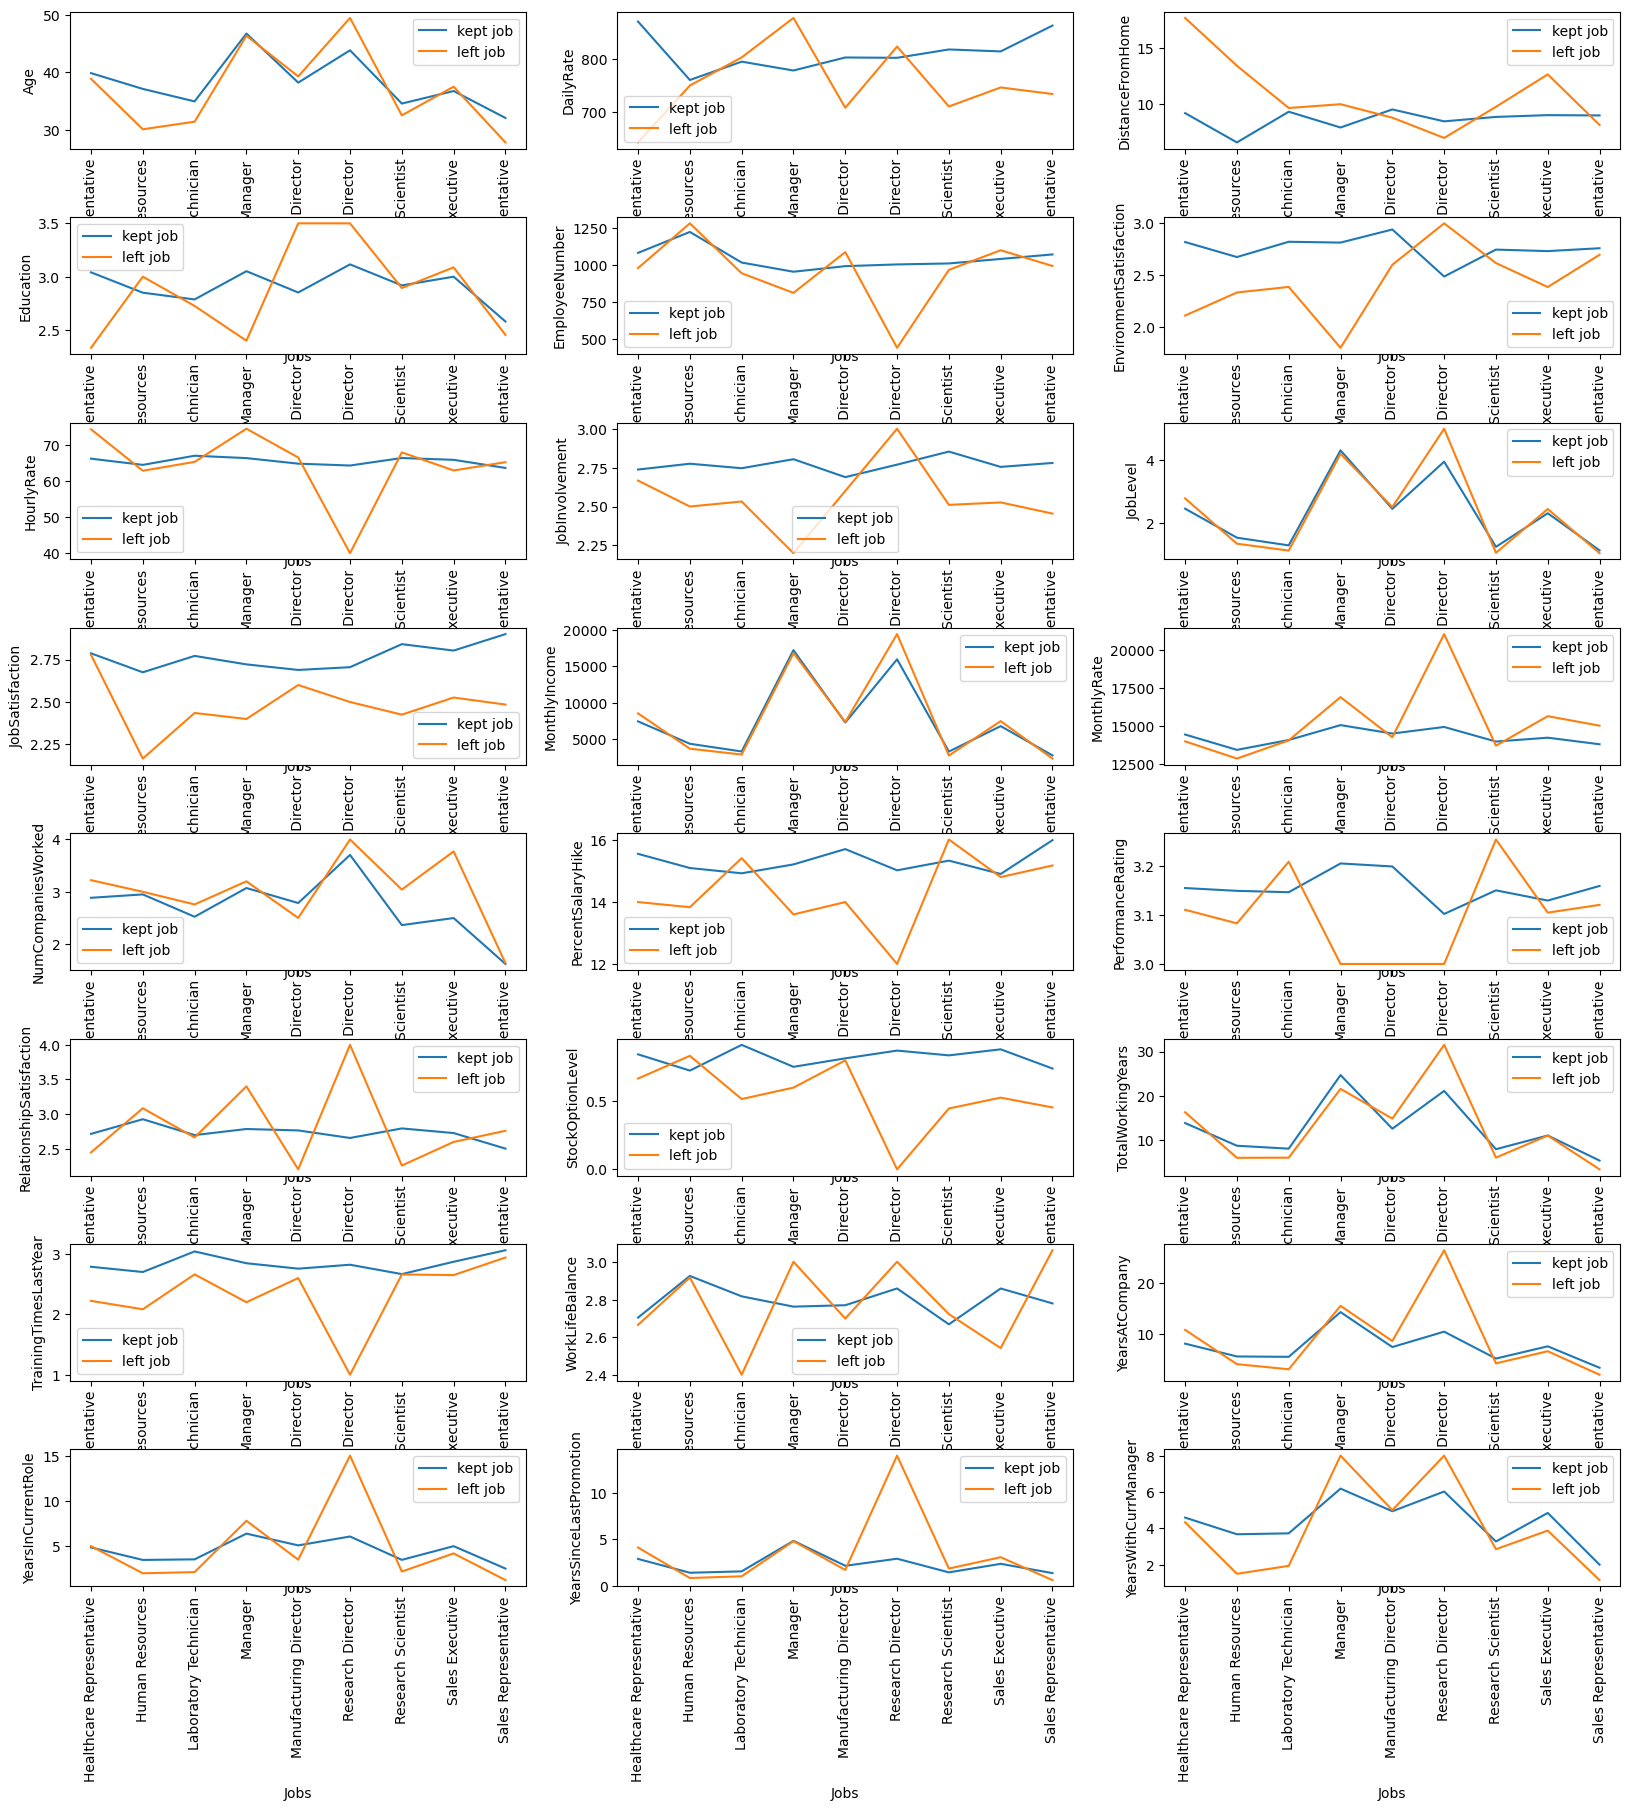

In [28]:


job_means = df.groupby(["Attrition", 'JobRole']).mean()
job_means = job_means.reset_index()
job_means



plt.figure(figsize=(20,20))
x = 1
plt.subplots_adjust(top = 0.90, bottom=0.01, hspace=0.5, wspace=0.2)


for i in con:
    plt.subplot(9,3,x)
    x = x + 1
     
    #get to plotting
    job_list = job_means["JobRole"]
    job_list = job_list.drop_duplicates()
    job_list = job_list.tolist()
    
    job_no = job_means[job_means['Attrition'].str.contains('No')]
    job_no = job_no[i]
    job_no = job_no.tolist()
    
    
    
    job_yes = job_means[job_means['Attrition'].str.contains('Yes')]
    job_yes = job_yes[i]
    job_yes = job_yes.tolist()
    
    
    
    plt.plot(job_list, job_no, label = "kept job" )
    plt.plot(job_list, job_yes, label = 'left job')
    
    
    plt.xlabel("Jobs")
    plt.ylabel(i)
    plt.xticks(rotation = 'vertical')
    
    plt.legend()   
plt.show()

In [13]:
age_bins = [0, 30, 40, 50, 60]

labels = ["<30", "31 - 40", "41 - 49", "51-60"]



df["Age_groups"] = pd.cut(df["Age"], bins = age_bins, labels = labels)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_groups
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,0,8,0,1,6,4,0,5,41 - 49
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,1,10,3,3,10,7,1,7,41 - 49
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,0,7,3,3,0,0,0,0,31 - 40
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,0,8,3,3,8,7,3,0,31 - 40
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,1,6,3,3,2,2,2,2,<30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,1,17,3,3,5,2,0,3,31 - 40
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,1,1,9,5,3,7,7,1,7,31 - 40
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,2,1,6,0,3,6,2,0,3,<30
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,4,0,17,3,2,9,6,0,8,41 - 49


In [14]:
# the definition is so I dont have to keep making new groupby statements with Attrition
def attrition_def(x):
    Count =  df.groupby([x,"Attrition"]).Age.count()
    Count = pd.DataFrame({"Count": Count})
    Count = Count.reset_index()
    
    return Count




    


In [15]:
attrition_def(cat[4])

,Gender,Attrition,Count
0,Female,No,501
1,Female,Yes,87
2,Male,No,732
3,Male,Yes,150


In [16]:
#makes stacked bar graph that examines count of people 

def attrition_graph(cat):
    Count =  df.groupby([cat,"Attrition"]).Age.count()
    Count = pd.DataFrame({"Count": Count})
    Count = Count.reset_index()
    
    
    att_list = Count[cat]
    att_list = att_list.drop_duplicates()
    att_list = att_list.tolist()
    



    att_no = Count[Count["Attrition"].str.contains('No')]
    att_no = att_no['Count']
    att_no = att_no.tolist()
    



    att_yes = Count[Count["Attrition"].str.contains('Yes')]
    att_yes = att_yes['Count']
    att_yes = att_yes.tolist()
    
    
    
    plt.bar(att_list, att_no, color='green')
    plt.bar(att_list, att_yes, bottom= att_no, color='red',)
    plt.xticks(rotation = 'vertical')

    labels = ["Kept job", "Left job"]
    plt.legend(labels)

    plt.show()


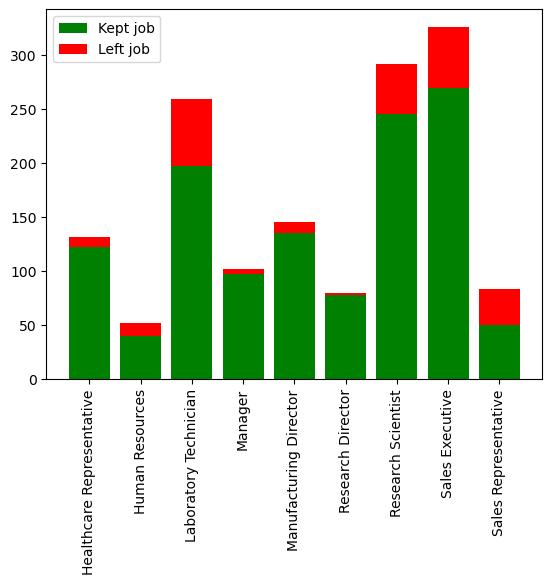

In [17]:
attrition_graph(cat[5])

In [33]:
def gender_def(num):
    num = cat[num]
    Count =  df.groupby([num,"Gender"]).Age.count()
    Count = pd.DataFrame({"Count": Count})
    Count = Count.reset_index()
    
    return Count

gender_def(0)

,Attrition,Gender,Count
0,No,Female,501
1,No,Male,732
2,Yes,Female,87
3,Yes,Male,150


In [49]:
#function to groupby and graph by Gender 

def gender_graph(num):
    
    num = cat[num]
    Count =  df.groupby([num,"Gender"]).Age.count()
    Count = pd.DataFrame({"Count": Count})
    Count = Count.reset_index()
    
    
    att_list = Count[num]
    att_list = att_list.drop_duplicates()
    att_list = att_list.tolist()
    



    att_no = Count[Count["Gender"].str.contains('Male')]
    att_no = att_no['Count']
    att_no = att_no.tolist()
    



    att_yes = Count[Count["Gender"].str.contains('Female')]
    att_yes = att_yes['Count']
    att_yes = att_yes.tolist()
    
    
    
    plt.bar(att_list, att_no, color='blue')
    plt.bar(att_list, att_yes, bottom= att_no, color='pink',)
    plt.xticks(rotation = 'vertical')

    labels = ["Male", "Female"]
    plt.legend(labels)

    plt.show()


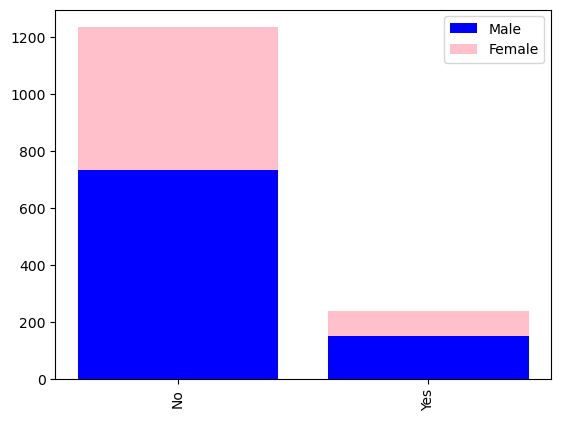

In [50]:
gender_graph(0)